In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data=pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


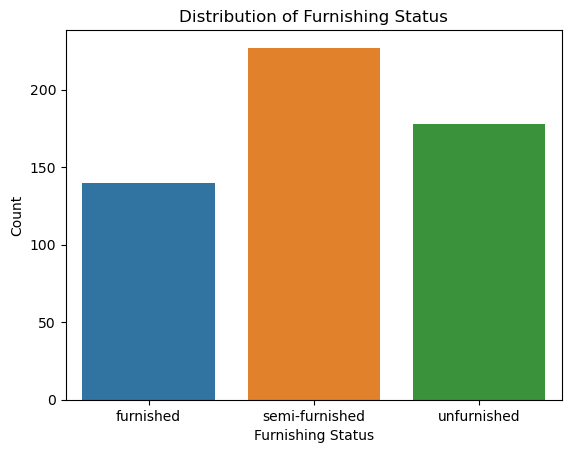

In [7]:
sns.countplot(x='furnishingstatus',data=data)
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

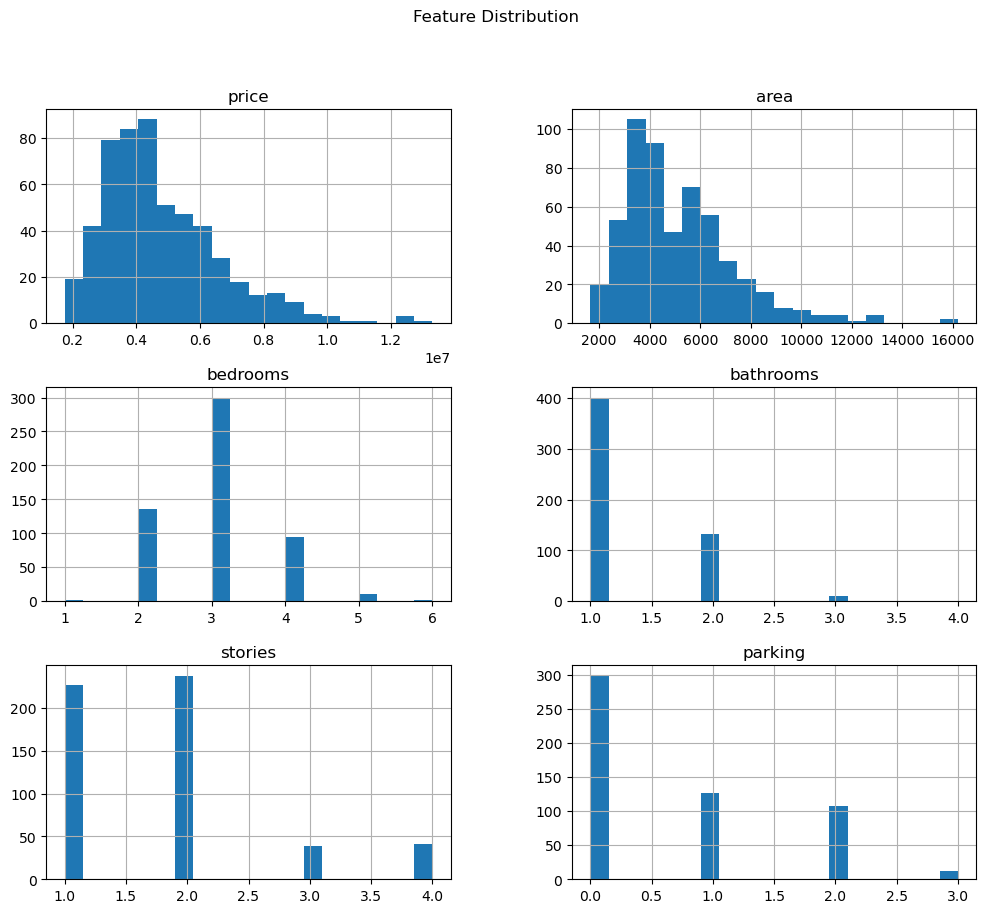

In [8]:
data.hist(figsize=(12,10),bins=20)
plt.suptitle("Feature Distribution")
plt.show()

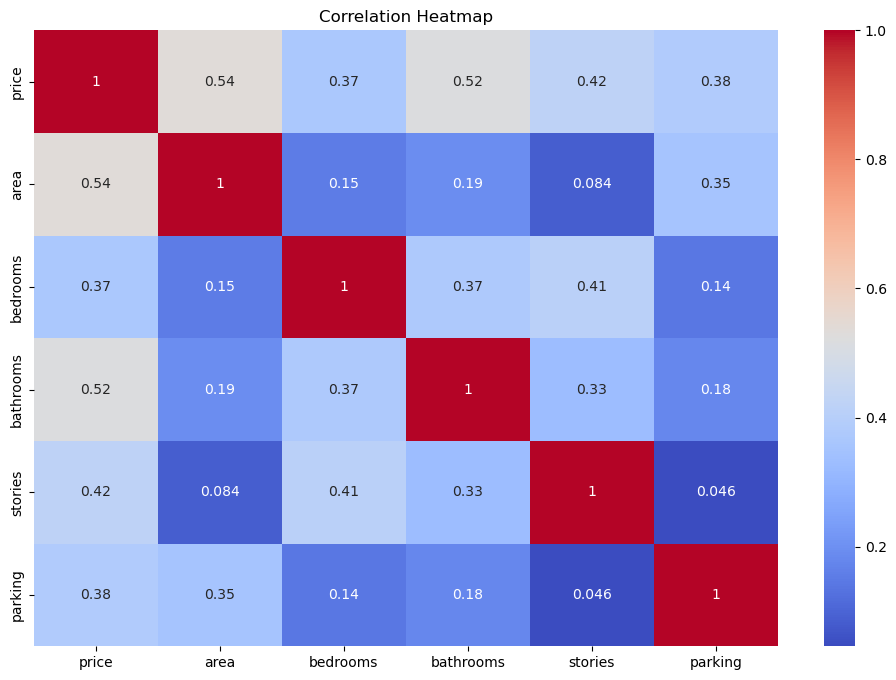

In [9]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Separate features and target for classification and regression
x_class = data.drop('furnishingstatus', axis=1)
y_class = data['furnishingstatus']

x_reg = data.drop('price', axis=1)
y_reg = data['price']

# Use pd.get_dummies to one-hot encode all categorical variables for classification
x_class_encoded = pd.get_dummies(x_class, drop_first=True)

# Use pd.get_dummies to one-hot encode all categorical variables for regression
x_reg_encoded = pd.get_dummies(x_reg, drop_first=True)

# Split data into training and testing sets for both tasks
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class_encoded, y_class, test_size=0.20, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg_encoded, y_reg, test_size=0.20, random_state=42)

In [11]:
# ---------------------- Linear Regression ----------------------

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train_reg, y_train_reg)

# Predictions and Evaluation
y_pred_reg = regressor.predict(x_test_reg)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Linear Regression Results:
Mean Squared Error: 1754318687330.6643
Mean Absolute Error: 970043.403920164
R2 Score: 0.6529242642153184


# Some Prediction Tests

In [12]:
x_train_reg.sample()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
103,6350,3,2,3,0,True,True,False,False,True,False,False,False


In [13]:
data.loc[349]

price                      3780000
area                          4820
bedrooms                         3
bathrooms                        1
stories                          2
mainroad                       yes
guestroom                       no
basement                        no
hotwaterheating                 no
airconditioning                 no
parking                          0
prefarea                        no
furnishingstatus    semi-furnished
Name: 349, dtype: object

In [14]:
#Price for a house with an area of 4000, 3 bed, 2 bath, 1 story, 1 parking spot, on mainroad, guestroom,
#no basement, hotwaterheating, aircon, in a preffered area, semi-furnished 
regressor.predict([[4820,3,1,2,0,1,0,0,0,0,0,1,0]])

C:\Users\bushc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3778174.20656496])

C:\Users\bushc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bushc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bushc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

     furnished       0.00      0.00      0.00         0
semi-furnished       0.90      0.35      0.50       101
   unfurnished       0.07      0.38      0.12         8

      accuracy                           0.35       109
     macro avg       0.32      0.24      0.21       109
  weighted avg       0.84      0.35      0.47       109



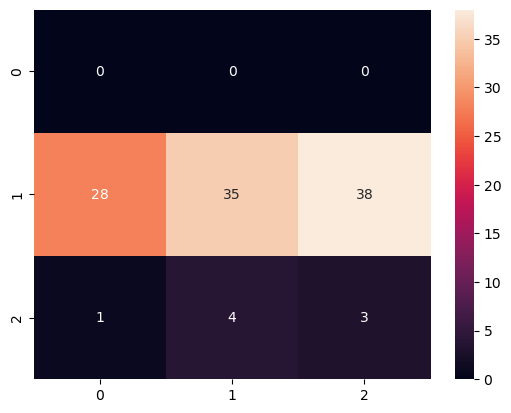

In [15]:
# Initialize and train the Logistic Regression model
classification=LogisticRegression(max_iter=1000)
classification.fit(x_train_class,y_train_class)

# Predictions and Evaluation
y_pred_class=classification.predict(x_test_class)
conf_matrix=confusion_matrix(y_pred_class,y_test_class)
sns.heatmap(conf_matrix,annot=True)

print(classification_report(y_pred_class,y_test_class))

### #2 with 70/30 split

In [44]:
# Separate features and target for classification and regression
x_class = data.drop('furnishingstatus', axis=1)
y_class = data['furnishingstatus']

x_reg = data.drop('price', axis=1)
y_reg = data['price']

# Use pd.get_dummies to one-hot encode all categorical variables for classification
x_class_encoded = pd.get_dummies(x_class, drop_first=True)

# Use pd.get_dummies to one-hot encode all categorical variables for regression
x_reg_encoded = pd.get_dummies(x_reg, drop_first=True)

# Split data into training and testing sets for both tasks
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class_encoded, y_class, test_size=0.30, random_state=50)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg_encoded, y_reg, test_size=0.30, random_state=50)

In [45]:
# ---------------------- Linear Regression ----------------------

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train_reg, y_train_reg)

# Predictions and Evaluation
y_pred_reg = regressor.predict(x_test_reg)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Linear Regression Results:
Mean Squared Error: 1107036130924.6936
Mean Absolute Error: 805679.6440129889
R2 Score: 0.6914395374406821


                precision    recall  f1-score   support

     furnished       0.00      0.00      0.00         0
semi-furnished       0.97      0.37      0.54       158
   unfurnished       0.05      0.50      0.08         6

      accuracy                           0.38       164
     macro avg       0.34      0.29      0.21       164
  weighted avg       0.93      0.38      0.52       164



C:\Users\bushc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bushc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bushc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


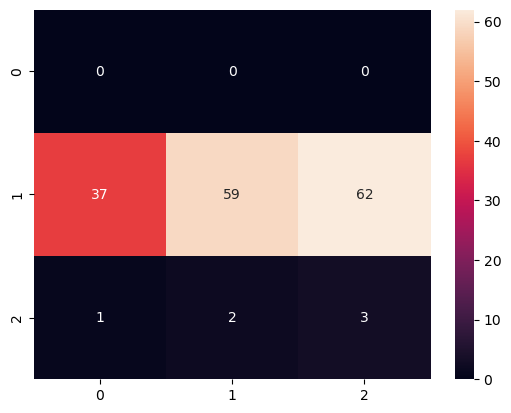

In [61]:
# Initialize and train the Logistic Regression model
classification=LogisticRegression(max_iter=1000)
classification.fit(x_train_class,y_train_class)

# Predictions and Evaluation
y_pred_class=classification.predict(x_test_class)
conf_matrix=confusion_matrix(y_pred_class,y_test_class)
sns.heatmap(conf_matrix,annot=True)

print(classification_report(y_pred_class,y_test_class))

### #3 

Text(0.5, 1.0, 'Correlation Heatmap')

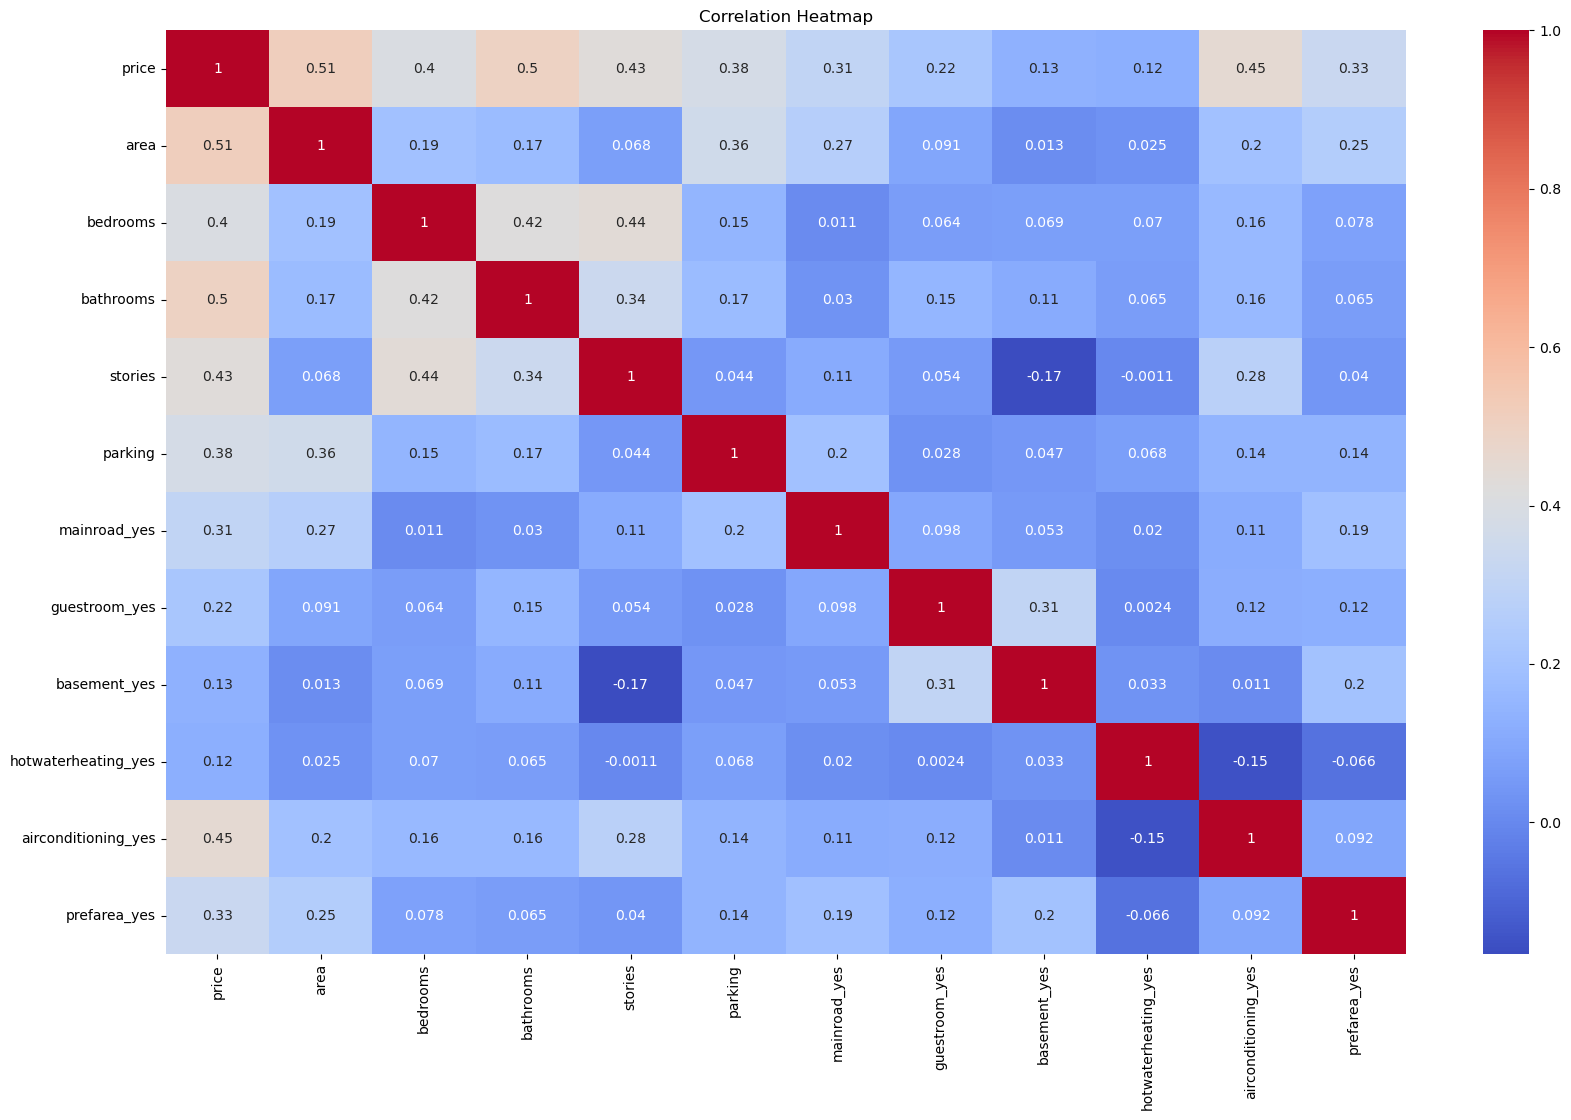

In [64]:
numeric_data = x_train_class
plt.figure(figsize=(20, 12))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")